# Sprint24課題 ゲート付きリカレントニューラルネットワーク

## KerasのRecurrentレイヤー
Kerasには複数のRecurrentレイヤーが用意されています。今回のSprintではこれら全てを動かし、それらを理解し区別できる状態を目指します。

以下のドキュメントにまとめられています。

[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

次の11個の項目があります。

- RNN
- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM


## 【問題1】各種手法の実行
Keras公式のサンプルをスタートコードとします。これを元に、上記11個の項目全てを使用してください。

例えばこの中でSimpleRNNとLSTMなどは並列関係であり、精度の比較が行えます。そういった関係を見つけて比較をしてください。

なおConvLSTM2Dのみ2次元配列を受け付ける手法であり、他と単純な精度の比較はできません。

LSTMのサンプルコード

[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)

ConvLSTM2Dのサンプルコード

[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [16]:
from __future__ import print_function

import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.datasets import imdb
from keras import backend as K

from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import ConvLSTM2D
from keras.layers import SimpleRNNCell
from keras.layers import GRUCell
from keras.layers import LSTMCell
from keras.layers import StackedRNNCells
from keras.layers import CuDNNGRU
from keras.layers import CuDNNLSTM

from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt


In [2]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)



Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


### RNN

In [3]:
class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = MinimalRNNCell(32)

In [4]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(RNN(cell))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Instructions for updating:
Colocations handled automatically by placer.
Train...
Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 61s 2ms/step - loss: 0.4609 - acc: 0.7755 - val_loss: 0.4169 - val_acc: 0.8144
Epoch 2/3
25000/25000 [==============================] - 23s 914us/step - loss: 0.2961 - acc: 0.8808 - val_loss: 0.3813 - val_acc: 0.8293
Epoch 3/3
25000/25000 [==============================] - 4s 155us/step
Test score: 0.4872781248283386
Test accuracy: 0.82056


### SimpleRNN

In [5]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 33s 1ms/step - loss: 0.6911 - acc: 0.5282 - val_loss: 0.6705 - val_acc: 0.6002
Epoch 2/3
25000/25000 [==============================] - 32s 1ms/step - loss: 0.6347 - acc: 0.6277 - val_loss: 0.6036 - val_acc: 0.6498
Epoch 3/3
25000/25000 [==============================] - 5s 214us/step
Test score: 0.496942722864151
Test accuracy: 0.76008


### GRU

In [6]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 101s 4ms/step - loss: 0.5052 - acc: 0.7488 - val_loss: 0.4050 - val_acc: 0.8150
Epoch 2/3
25000/25000 [==============================] - 100s 4ms/step - loss: 0.3402 - acc: 0.8587 - val_loss: 0.3902 - val_acc: 0.8270
Epoch 3/3
25000/25000 [==============================] - 16s 643us/step
Test score: 0.3953758583164215
Test accuracy: 0.82916


### LSTM

In [7]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 125s 5ms/step - loss: 0.4861 - acc: 0.7626 - val_loss: 0.3921 - val_acc: 0.8251
Epoch 2/3
25000/25000 [==============================] - 123s 5ms/step - loss: 0.3208 - acc: 0.8675 - val_loss: 0.3863 - val_acc: 0.8290
Epoch 3/3
25000/25000 [==============================] - 20s 808us/step
Test score: 0.40558945016860964
Test accuracy: 0.825


### ConvLSTM2D

Train on 950 samples, validate on 50 samples
Epoch 1/5
950/950 [==============================] - 117s 123ms/step - loss: 0.2292 - val_loss: 0.0556
Epoch 2/5
950/950 [==============================] - 109s 115ms/step - loss: 0.0173 - val_loss: 0.0104
Epoch 3/5
950/950 [==============================] - 109s 115ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 4/5
950/950 [==============================] - 109s 115ms/step - loss: 0.0011 - val_loss: 8.8770e-04
Epoch 5/5
950/950 [==============================] - 109s 115ms/step - loss: 7.0234e-04 - val_loss: 5.8065e-04


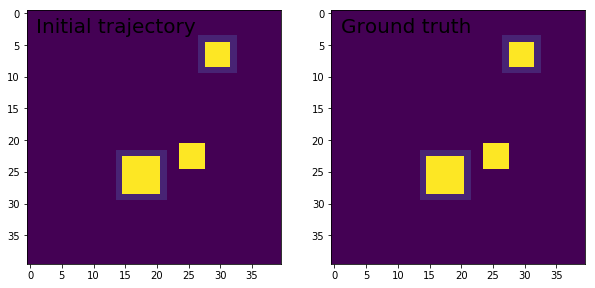

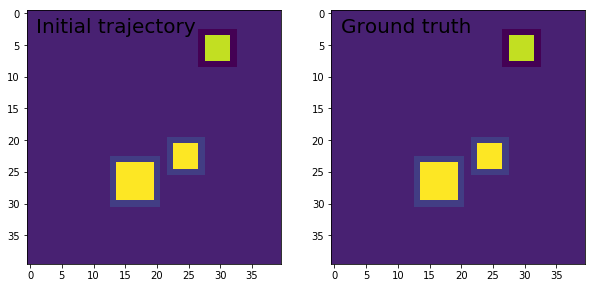

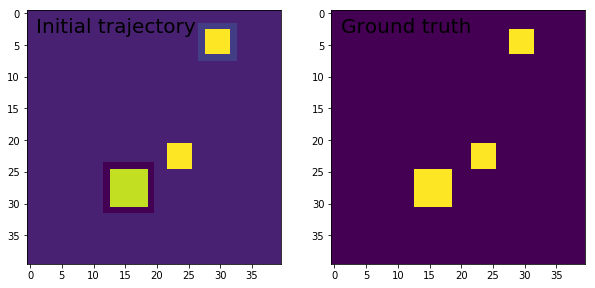

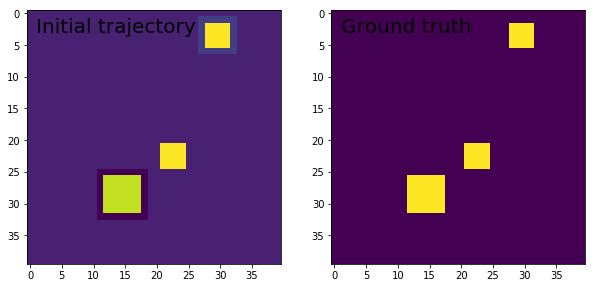

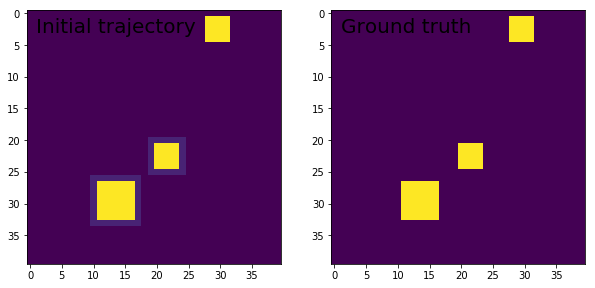

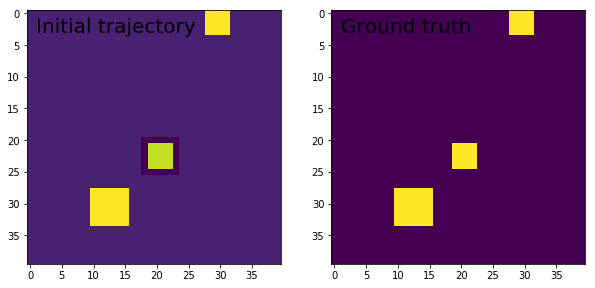

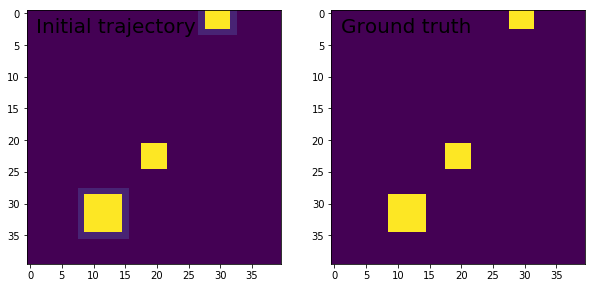

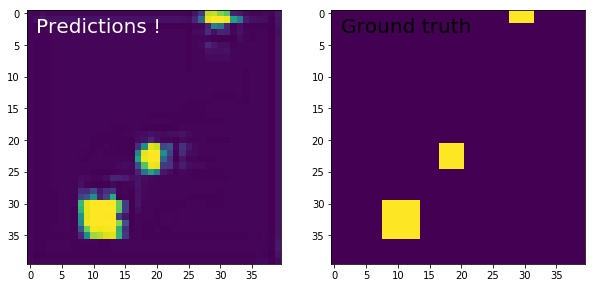

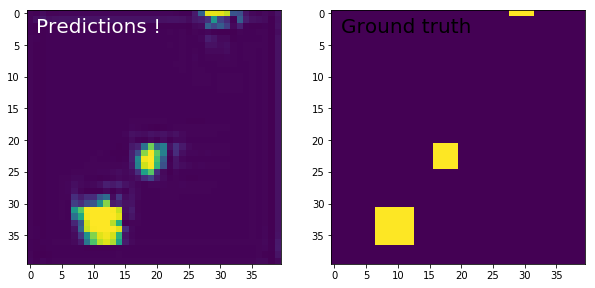

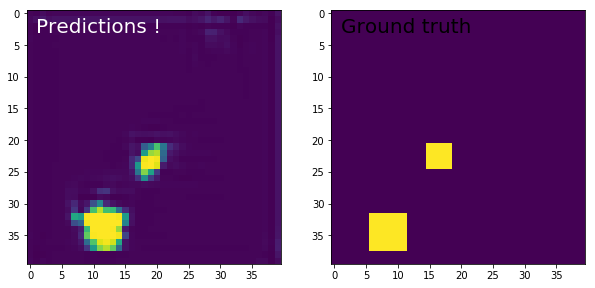

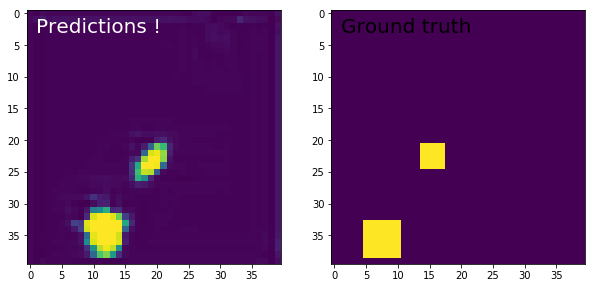

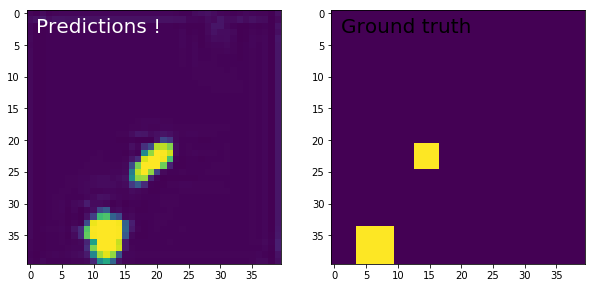

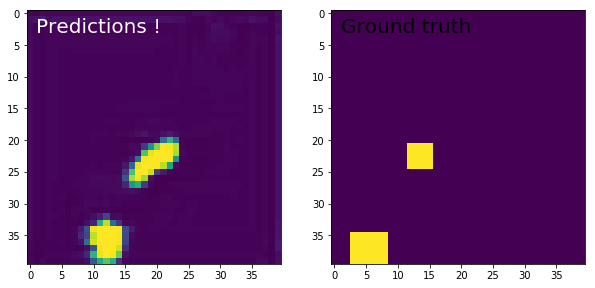

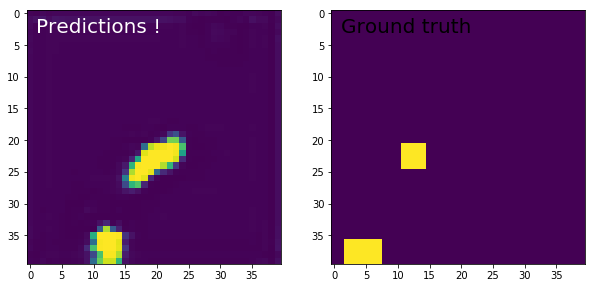

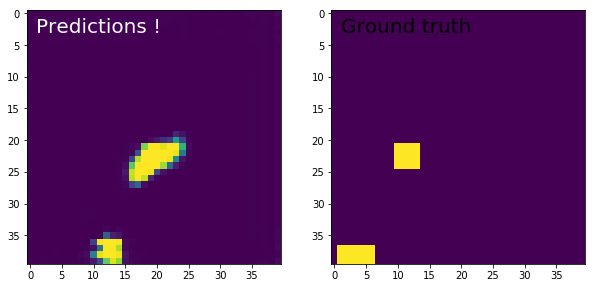

In [19]:
# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=5, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

### SimpleRNNCell

In [9]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(RNN(SimpleRNNCell(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 33s 1ms/step - loss: 0.6908 - acc: 0.5356 - val_loss: 0.6797 - val_acc: 0.5522
Epoch 2/3
25000/25000 [==============================] - 32s 1ms/step - loss: 0.6447 - acc: 0.6186 - val_loss: 0.6379 - val_acc: 0.6057
Epoch 3/3
25000/25000 [==============================] - 6s 233us/step
Test score: 0.6296901931190491
Test accuracy: 0.63516


### GRUCell

In [10]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(RNN(GRUCell(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 101s 4ms/step - loss: 0.5017 - acc: 0.7516 - val_loss: 0.4165 - val_acc: 0.8127
Epoch 2/3
25000/25000 [==============================] - 99s 4ms/step - loss: 0.3433 - acc: 0.8567 - val_loss: 0.3836 - val_acc: 0.8305
Epoch 3/3
25000/25000 [==============================] - 16s 630us/step
Test score: 0.40232622364997866
Test accuracy: 0.82232


### LSTMCell

In [11]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(RNN(LSTMCell(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 125s 5ms/step - loss: 0.4842 - acc: 0.7692 - val_loss: 0.4591 - val_acc: 0.7882
Epoch 2/3
25000/25000 [==============================] - 122s 5ms/step - loss: 0.3213 - acc: 0.8719 - val_loss: 0.3799 - val_acc: 0.8320
Epoch 3/3
25000/25000 [==============================] - 20s 807us/step
Test score: 0.4094893989562988
Test accuracy: 0.82456


### StackedRNNCells

In [13]:
cells = [
    LSTMCell(32, dropout=0.2, recurrent_dropout=0.2),
    GRUCell(32, dropout=0.2, recurrent_dropout=0.2),
]

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(RNN(StackedRNNCells(cells)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 204s 8ms/step - loss: 0.4792 - acc: 0.7685 - val_loss: 0.3843 - val_acc: 0.8288
Epoch 2/3
25000/25000 [==============================] - 200s 8ms/step - loss: 0.3158 - acc: 0.8714 - val_loss: 0.3852 - val_acc: 0.8344
Epoch 3/3
25000/25000 [==============================] - 34s 1ms/step
Test score: 0.4666923954677582
Test accuracy: 0.81652


### ※StackedRNNCellsを利用せずに

In [20]:
cells = [
    LSTMCell(32, dropout=0.2, recurrent_dropout=0.2),
    GRUCell(32, dropout=0.2, recurrent_dropout=0.2),
]

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(RNN(cells))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 206s 8ms/step - loss: 0.4764 - acc: 0.7686 - val_loss: 0.4133 - val_acc: 0.8184
Epoch 2/3
25000/25000 [==============================] - 199s 8ms/step - loss: 0.3196 - acc: 0.8691 - val_loss: 0.3896 - val_acc: 0.8298
Epoch 3/3
25000/25000 [==============================] - 34s 1ms/step
Test score: 0.405453797750473
Test accuracy: 0.8314


### CuDNNGRU

In [14]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(CuDNNGRU(32))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 42s 2ms/step - loss: 0.4478 - acc: 0.7767 - val_loss: 0.3709 - val_acc: 0.8355
Epoch 2/3
25000/25000 [==============================] - 15s 602us/step - loss: 0.2651 - acc: 0.8925 - val_loss: 0.3706 - val_acc: 0.8358
Epoch 3/3
25000/25000 [==============================] - 4s 160us/step
Test score: 0.39629286725997925
Test accuracy: 0.83228


### CuDNNLSTM

In [15]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(CuDNNLSTM(32))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 17s 696us/step - loss: 0.4359 - acc: 0.7913 - val_loss: 0.3587 - val_acc: 0.8451
Epoch 2/3
25000/25000 [==============================] - 15s 599us/step - loss: 0.2557 - acc: 0.8967 - val_loss: 0.3820 - val_acc: 0.8401
Epoch 3/3
25000/25000 [==============================] - 4s 158us/step
Test score: 0.4392903882312775
Test accuracy: 0.83252


### まとめ
#### <条件>
- AWS EC2 p2.xlargeインスタンにて実行
- ConvLSTM2Dを除き、すべて同一パラメータにて実行
    - epoch : 3
    - units : 32

#### <テスト予測精度と学習時間(3epoch目)>
- **RNN**(MinimalRNNCellを利用)  
    - Test accuracy : 0.82056
    - 22s 889us/step


- **SimpleRNN**
    - Test accuracy: 0.76008
    - 31s 1ms/step


- **GRU**
    - Test accuracy: 0.82916
    - 100s 4ms/step


- **LSTM**
    - Test accuracy: 0.825
    - 123s 5ms/step


- **ConvLSTM2D**
    - 精度比較なし


- **SimpleRNNCell**
    - Test accuracy: 0.63516
    - 31s 1ms/step 


- **GRUCell**
    - Test accuracy: 0.82232
    - 98s 4ms/step


- **LSTMCell**
    - Test accuracy: 0.82456
    - 120s 5ms/step


- **StackedRNNCells**(GRUCell, LSTMCellのstack)
    - Test accuracy: 0.81652
    - 199s 8ms/step
    
- StackedRNNCellsを利用せずにRNN(cells)で実行
    - Test accuracy: 0.8314
    - 199s 8ms/step


- **CuDNNGRU**
    - Test accuracy: 0.83228
    - 15s 601us/step


- **CuDNNLSTM**
    - Test accuracy: 0.83252
    - 15s 602us/step

#### <結果>
- GPUを利用したCuDNNGRU、CuDNNLSTMの学習スピードが圧倒的に早く、精度もわずかに他の手法を上回った。

- StackedRNNCellsを利用した場合と使用せずにそのままRNNのcellsに使用した場合を比較したが、精度もStackedRNNCellsを利用しない場合のほうが高くなり、利用価値が不明。使用方法が違う？

- 直接Reccurentレイヤーを利用する方法(SimpleRNN, LSTM,GRU)と、RNNレイヤーのcellに各種手法を導入する方法(SimpleRNNCell, LSTMCell, GRUCell)を比較すると、SimpleRNNの場合のみ精度に差が発生したが、それ以外は精度、学習スピードともにおおよそ近い結果がでた

- 上記のあと、googleコラボにて実行したところ、処理速度はコラボの方が早かった。。

## 【問題2】比較結果の説明
11の項目それぞれがどういうものなのかを説明してください。また、比較した結果を表やグラフで載せ、説明してください。今回は「RNNはそれほど詳しくないがタスクで必要になったためKerasのドキュメントを見た」という仮定を置きます。**!!!**

![まとめ](https://sn3301files.storage.live.com/y4p-Co9ZXyLQKcfQGgRbIBlR5DYxsvVQrXbFRG5UtqpUsmWi7KhZLM1qTATmPdti2emJ5B1jf-R4NdEB7HJ3X0iWb9csEKGpCk0cXjY-KWHCFp5hM6XS0wFGzH9Y7UATPp6mKMlI8xkROSJ9w6oZvAzWQia3YFzHl5Dtf8Ulzx9GLa0B15DDHvE7hoiRx0s1pzT/reccurent%E3%83%AC%E3%82%A4%E3%83%A4%E3%83%BC%E3%81%BE%E3%81%A8%E3%82%81.png?psid=1&width=720&height=348)


### SimpleRNN, LSTM, GRUの比較

#### SimpleRNN
![simplernn](https://cdn-images-1.medium.com/max/1000/1*xn5kA92_J5KLaKcP7BMRLA.gif)

#### LSTM
![LSTM](https://cdn-images-1.medium.com/max/800/1*goJVQs-p9kgLODFNyhl9zA.gif)

#### GRU
![GRU](https://cdn-images-1.medium.com/max/800/1*FpRS0C3EHQnELVaWRvb8bg.gif)

- 参考URL  
https://towardsdatascience.com/animated-rnn-lstm-and-gru-ef124d06cf45

## 【問題3】（アドバンス課題）複数のデータセット間での比較
単一のデータセットでの実験に留めず、他のデータセットでも実験してみます。

[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。IMDBは2値分類であったが、こちらは46値分類の問題です。

**※省略**